# FORECASTING

In [90]:
#from https://wire.insiderfinance.io/game-stop-stock-market-price-prediction-using-rnn-lstm-7d6cfabfad51

In [91]:
#See the yahoo finance ticker for your stock symbol

#stock_symbol = '^GSPC'
stock_symbol = '^VIX'

#stock_symbol = 'CL=F'
#stock_symbol = 'NG=F'

#stock_symbol = 'GC=F'
#stock_symbol = 'SI=F'
#stock_symbol = 'HG=F'

#stock_symbol = 'EURUSD=X'
#stock_symbol = 'EURCHF=X'

Object_study = 'VIX'

# WITH LSTM 30-30-20-10 WITH 50 EPOCHS

In [92]:
#Installing dependencies to read and plot real time financial markets webdata

In [93]:
#pip install yfinance

In [94]:
#pip install plotly==5.3.1

In [95]:
#import plotly.graph_objs as go
import yfinance as yf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
#from plotly.graph_objs import graph_objs
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [96]:
origdata = yf.download(tickers=stock_symbol, period='5y', interval='1d')
origdata

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-17,12.200000,12.750000,11.790000,11.870000,11.870000,0
2017-01-18,11.790000,12.810000,11.690000,12.480000,12.480000,0
2017-01-19,12.580000,13.280000,12.170000,12.780000,12.780000,0
2017-01-20,12.580000,12.590000,11.530000,11.540000,11.540000,0
2017-01-23,12.300000,12.620000,11.590000,11.770000,11.770000,0
...,...,...,...,...,...,...
2022-01-10,19.580000,23.330000,19.290001,19.400000,19.400000,0
2022-01-11,19.620001,21.000000,18.200001,18.410000,18.410000,0
2022-01-12,18.170000,18.690001,17.360001,17.620001,17.620001,0


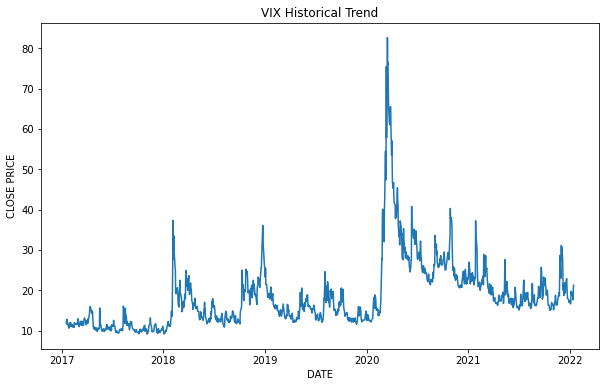

In [97]:
plt.title("{0} Historical Trend".format(Object_study))
plt.xlabel("DATE")
plt.ylabel("CLOSE PRICE")
plt.plot(origdata['Close'])

In [98]:
cols_to_keep = ["Close"]
data = origdata.loc[:,cols_to_keep]

In [99]:
data 

,Close
Date,
2017-01-17,11.870000
2017-01-18,12.480000
2017-01-19,12.780000
2017-01-20,11.540000
2017-01-23,11.770000
...,...
2022-01-10,19.400000
2022-01-11,18.410000
2022-01-12,17.620001


In [100]:
# Create isocalendar
closingdata = origdata
closingdata["week"] = closingdata.index.isocalendar().week

# Completing Time Series
idx = pd.date_range(closingdata.index[0], closingdata.index[-1]) #create dates for completed time series
completedata =closingdata.reindex(idx, fill_value= float("NaN")) #complete missing dates with NAN
completedata = completedata.fillna(method='ffill') #fill NAN with last observation (e.g., Value for Friday on Weekend)


In [101]:
cols_to_keep = ["Close"]
alldata = completedata.loc[:,cols_to_keep]
alldata

,Close
2017-01-17,11.870000
2017-01-18,12.480000
2017-01-19,12.780000
2017-01-20,11.540000
2017-01-21,11.540000
...,...
2022-01-10,19.400000
2022-01-11,18.410000
2022-01-12,17.620001
2022-01-13,20.309999


In [102]:
#data=data.reset_index()

In [103]:
alldata.dtypes

Close    float64
dtype: object

In [104]:
dataset = alldata.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1460

In [105]:
dataset.shape

(1824, 1)

# scaling data

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [107]:
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.0371176 ],
       [0.04541127],
       [0.04949013],
       ...,
       [0.11529572],
       [0.15186946],
       [0.16464989]])

In [108]:
scaled_dataset.shape

(1824, 1)

# data_testingscaled not needed???

In [109]:
#data_testingscaled = scaler.fit_transform(data_testing)
#data_testingscaled

In [110]:
#data_testingscaled.shape

# create training dataset
# x_train (1401,60,1) and y_train (1401,)
# TO TRAIN THE MODEL

In [111]:
#Create the training data set and the scaled training data set
data_trainingscaled = scaler.fit_transform(dataset[:training_data_len])
data_trainingscaled

array([[0.0371176 ],
       [0.04541127],
       [0.04949013],
       ...,
       [0.17770222],
       [0.19184227],
       [0.20666213]])

In [112]:
data_trainingscaled.shape

(1460, 1)

In [113]:
#split the data into x_train and y_train data sets
x_train = []
y_train = []

In [114]:
#set training for 60 days # data_training.shape[0]


for i in range(60, data_trainingscaled.shape[0]):
    x_train.append(data_trainingscaled[i-60 : i])
    y_train.append(data_trainingscaled[i,0])



In [115]:
#convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train) , np.array(y_train)

In [116]:
print(x_train.shape)
print(y_train.shape)

(1400, 60, 1)
(1400,)


In [117]:
x_train

array([[[0.0371176 ],
        [0.04541127],
        [0.04949013],
        ...,
        [0.03385452],
        [0.02814411],
        [0.02909584]],

       [[0.04541127],
        [0.04949013],
        [0.03263086],
        ...,
        [0.02814411],
        [0.02909584],
        [0.02909584]],

       [[0.04949013],
        [0.03263086],
        [0.03263086],
        ...,
        [0.02909584],
        [0.02909584],
        [0.02909584]],

       ...,

       [[0.18980285],
        [0.18980285],
        [0.18096533],
        ...,
        [0.1688647 ],
        [0.20312711],
        [0.19292997]],

       [[0.18980285],
        [0.18096533],
        [0.18450032],
        ...,
        [0.20312711],
        [0.19292997],
        [0.17770222]],

       [[0.18096533],
        [0.18450032],
        [0.19986403],
        ...,
        [0.19292997],
        [0.17770222],
        [0.19184227]]])

In [118]:
y_train

array([0.02909584, 0.02909584, 0.02991162, ..., 0.17770222, 0.19184227,
       0.20666213])

# create the model using LSTM ReLu using Sequential function  and NN 50-50-25-1

In [119]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [120]:
model = Sequential()

In [121]:
# be careful to the x_train.shape[1],***
model.add(LSTM(units=50,activation='relu',return_sequences=True ,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation='relu',return_sequences=False ))
model.add(Dropout(0.2))
#model.add(LSTM(units=25,activation='relu',return_sequences=True ))
#model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(units=1))

In [122]:
#model.summary()

In [123]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [124]:
#train the model
model.fit(x_train,y_train, epochs = 50, batch_size = 32)

Epoch 1/50
44/44 [==============================] - 7s 57ms/step - loss: 0.0092
Epoch 2/50
44/44 [==============================] - 3s 61ms/step - loss: 0.0032
Epoch 3/50
44/44 [==============================] - 3s 79ms/step - loss: 0.0032
Epoch 4/50
44/44 [==============================] - 3s 79ms/step - loss: 0.0029
Epoch 5/50
44/44 [==============================] - 4s 85ms/step - loss: 0.0019
Epoch 6/50
44/44 [==============================] - 4s 80ms/step - loss: 0.0020
Epoch 7/50
44/44 [==============================] - 4s 82ms/step - loss: 0.0018
Epoch 8/50
44/44 [==============================] - 4s 82ms/step - loss: 0.0018
Epoch 9/50
44/44 [==============================] - 4s 81ms/step - loss: 0.0017
Epoch 10/50
44/44 [==============================] - 4s 83ms/step - loss: 0.0015
Epoch 11/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0014
Epoch 12/50
44/44 [==============================] - 3s 79ms/step - loss: 0.0016
Epoch 13/50
44/44 [==================

# preparing for test data set

# data_testing (array 365 backwards from today)

In [125]:
data_testing = dataset[training_data_len:]
data_testing.shape

(364, 1)

# training data (1008 onwards from beginning)

In [126]:
#training_data = dataset[:training_data_len]
#training_data

In [127]:
#training_data.shape

# past days (60 days tail Training Data)

In [128]:
# data_training = pd.DataFrame(data_training)
#past_days = training_data.tail(60)
#past_days

In [129]:
#past_days.info()

In [130]:
#testdays = past_days.append(testing_data, ignore_index=True)

# testdays (312 days backwards from today)

In [131]:
#testdays

# testing_datascaled (365 backwards from today)

In [132]:
#create a new array containing scaled values 
data_testingscaled = scaler.transform(data_testing)
data_testingscaled.shape

(364, 1)

# create the data set x_test and y_test
# x_test (252,60,1) and y_test (252)

In [133]:
x_test = []
y_test = []

#set testing for 60 days 

for i in range(60, data_testingscaled.shape[0]):
    x_test.append(data_testingscaled[i-60 : i])
    y_test.append(data_testingscaled[i,0])

In [134]:
#the lists coming out from the previous block need to be transformed in a numy array
x_test , y_test = np.array(x_test) ,np.array(y_test)

In [135]:
x_test

array([[[0.20666213],
        [0.20666213],
        [0.20666213],
        ...,
        [0.15703603],
        [0.14806254],
        [0.14479946]],

       [[0.20666213],
        [0.20666213],
        [0.19170631],
        ...,
        [0.14806254],
        [0.14479946],
        [0.13718557]],

       [[0.20666213],
        [0.19170631],
        [0.16913663],
        ...,
        [0.14479946],
        [0.13718557],
        [0.16913663]],

       ...,

       [[0.09721279],
        [0.09721279],
        [0.09993201],
        ...,
        [0.13079537],
        [0.13949693],
        [0.1260367 ]],

       [[0.09721279],
        [0.09993201],
        [0.09830048],
        ...,
        [0.13949693],
        [0.1260367 ],
        [0.11529572]],

       [[0.09993201],
        [0.09830048],
        [0.10836166],
        ...,
        [0.1260367 ],
        [0.11529572],
        [0.15186946]]])

In [136]:
x_test.shape

(304, 60, 1)

In [137]:
y_test.shape

(304,)

In [138]:
y_test = np.reshape(y_test,(y_test.shape[0],1))
y_test.shape

(304, 1)

In [139]:
#reshape the data
#x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [140]:
#x_test.shape

In [141]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[19.22999954],
       [21.57999992],
       [20.95000076],
       [20.95000076],
       [20.95000076],
       [18.87999916],
       [20.29999924],
       [21.20000076],
       [19.80999947],
       [18.86000061],
       [18.86000061],
       [18.86000061],
       [20.73999977],
       [19.61000061],
       [19.39999962],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.90999985],
       [18.12000084],
       [17.15999985],
       [16.95000076],
       [16.69000053],
       [16.69000053],
       [16.69000053],
       [16.90999985],
       [16.64999962],
       [16.98999977],
       [16.56999969],
       [16.25      ],
       [16.25      ],
       [16.25      ],
       [17.29000092],
       [18.68000031],
       [17.5       ],
       [18.70999908],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.63999939],
       [17.55999947],
       [17.28000069],
       [17.61000061],
       [18.61000061],
       [18

In [142]:
# get the models predicted price values
y_prediction = model.predict(x_test)
#y_prediction=np.reshape(y_prediction,(y_prediction.shape[0],y_prediction.shape[1]))
y_prediction.shape

(304, 1)

In [143]:
print(y_prediction)

[[0.14963797]
 [0.14545445]
 [0.15289688]
 [0.15831843]
 [0.16116436]
 [0.16210648]
 [0.15235262]
 [0.15067042]
 [0.15532623]
 [0.15359028]
 [0.14591135]
 [0.13974647]
 [0.13668638]
 [0.14431699]
 [0.1469203 ]
 [0.14643593]
 [0.13434714]
 [0.12274865]
 [0.1159953 ]
 [0.11358425]
 [0.11746517]
 [0.12264325]
 [0.12043805]
 [0.11554956]
 [0.11021098]
 [0.10696343]
 [0.10568207]
 [0.1071079 ]
 [0.1068868 ]
 [0.10886979]
 [0.10761918]
 [0.10386962]
 [0.10105174]
 [0.09964555]
 [0.10661167]
 [0.120116  ]
 [0.12385757]
 [0.13040057]
 [0.12702599]
 [0.12189507]
 [0.11813226]
 [0.11832813]
 [0.11890233]
 [0.11757954]
 [0.11853127]
 [0.12561905]
 [0.1311553 ]
 [0.13423304]
 [0.1335717 ]
 [0.13840514]
 [0.14086719]
 [0.1375136 ]
 [0.12396698]
 [0.11236054]
 [0.10573265]
 [0.12004271]
 [0.14256382]
 [0.18678823]
 [0.19743118]
 [0.18083286]
 [0.15897928]
 [0.1432314 ]
 [0.14073168]
 [0.14890963]
 [0.16072862]
 [0.16277878]
 [0.15912017]
 [0.15539302]
 [0.15304641]
 [0.14290613]
 [0.13724127]
 [0.12

In [144]:
#y_prediction= y_prediction.reshape(-1,1)
#y_prediction=pd.Dataframe(y_prediction)
y_prediction

array([[0.14963797],
       [0.14545445],
       [0.15289688],
       [0.15831843],
       [0.16116436],
       [0.16210648],
       [0.15235262],
       [0.15067042],
       [0.15532623],
       [0.15359028],
       [0.14591135],
       [0.13974647],
       [0.13668638],
       [0.14431699],
       [0.1469203 ],
       [0.14643593],
       [0.13434714],
       [0.12274865],
       [0.1159953 ],
       [0.11358425],
       [0.11746517],
       [0.12264325],
       [0.12043805],
       [0.11554956],
       [0.11021098],
       [0.10696343],
       [0.10568207],
       [0.1071079 ],
       [0.1068868 ],
       [0.10886979],
       [0.10761918],
       [0.10386962],
       [0.10105174],
       [0.09964555],
       [0.10661167],
       [0.120116  ],
       [0.12385757],
       [0.13040057],
       [0.12702599],
       [0.12189507],
       [0.11813226],
       [0.11832813],
       [0.11890233],
       [0.11757954],
       [0.11853127],
       [0.12561905],
       [0.1311553 ],
       [0.134

In [145]:
y_prediction = scaler.inverse_transform(y_prediction)

In [146]:
#scale = 1/1.65480721e-02

In [147]:
#y_prediction = y_prediction* scale
#y_test = y_test * scale

In [148]:
y_prediction.shape

(304, 1)

In [149]:
print(y_prediction)

[[20.145874 ]
 [19.838175 ]
 [20.385567 ]
 [20.784323 ]
 [20.993639 ]
 [21.062933 ]
 [20.345535 ]
 [20.22181  ]
 [20.564245 ]
 [20.436565 ]
 [19.87178  ]
 [19.418354 ]
 [19.193285 ]
 [19.754515 ]
 [19.94599  ]
 [19.910362 ]
 [19.021235 ]
 [18.168163 ]
 [17.671455 ]
 [17.494122 ]
 [17.779564 ]
 [18.160412 ]
 [17.998219 ]
 [17.63867  ]
 [17.246017 ]
 [17.007162 ]
 [16.912916 ]
 [17.017786 ]
 [17.001524 ]
 [17.147373 ]
 [17.055391 ]
 [16.779612 ]
 [16.572357 ]
 [16.468931 ]
 [16.981289 ]
 [17.974533 ]
 [18.249725 ]
 [18.730963 ]
 [18.482763 ]
 [18.105383 ]
 [17.828629 ]
 [17.843035 ]
 [17.885267 ]
 [17.787975 ]
 [17.857975 ]
 [18.379282 ]
 [18.786472 ]
 [19.01284  ]
 [18.9642   ]
 [19.3197   ]
 [19.500782 ]
 [19.254126 ]
 [18.257772 ]
 [17.404118 ]
 [16.916637 ]
 [17.969141 ]
 [19.62557  ]
 [22.878277 ]
 [23.661064 ]
 [22.440258 ]
 [20.832926 ]
 [19.674671 ]
 [19.490816 ]
 [20.092304 ]
 [20.96159  ]
 [21.11238  ]
 [20.84329  ]
 [20.569157 ]
 [20.396564 ]
 [19.650747 ]
 [19.234097 ]
 [18.4

In [150]:
y_prediction.shape

(304, 1)

In [151]:
y_prediction=pd.DataFrame(y_prediction)
y_prediction

,0
0,20.145874
1,19.838175
2,20.385567
3,20.784323
4,20.993639
...,...
299,19.336687
300,19.487543
301,19.242392
302,18.650494


In [152]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean (y_prediction - y_test)**2)
rmse

0    0.161605
dtype: float64

In [153]:
data_training = dataset[:training_data_len]
data_training=pd.DataFrame(data_training)


training_datadates = pd.DataFrame()
training_datadates['Date'] = pd.date_range('01/11/2017', periods = 1462 , freq ='d')

data_training.columns=['Actual_Close']
data_training = pd.concat([training_datadates,data_training],axis=1)


#data_training.set_index(data_training["Date"], inplace=True)
#data_training=data_training.drop(['Date'], axis=1)
data_training

,Date,Actual_Close
0,2017-01-11,11.870000
1,2017-01-12,12.480000
2,2017-01-13,12.780000
3,2017-01-14,11.540000
4,2017-01-15,11.540000
...,...,...
1457,2021-01-07,22.209999
1458,2021-01-08,23.250000
1459,2021-01-09,24.340000
1460,2021-01-10,NaN


In [154]:
valid = dataset[training_data_len:]
valid = pd.DataFrame(valid)

validdates = pd.DataFrame()
validdates['Date'] = pd.date_range('01/12/2021', periods = 365 , freq ='d')

valid.columns=['Actual_Close']
valid = pd.concat([validdates,valid],axis=1)
#valid.set_index(valid["Date"], inplace=True)
#valid=valid.drop(['Date'], axis=1)
valid

,Date,Actual_Close
0,2021-01-12,24.340000
1,2021-01-13,24.340000
2,2021-01-14,24.340000
3,2021-01-15,23.240000
4,2021-01-16,21.580000
...,...,...
360,2022-01-07,18.410000
361,2022-01-08,17.620001
362,2022-01-09,20.309999
363,2022-01-10,21.250000


In [155]:
y_prediction=pd.DataFrame(y_prediction)

predictionsdates=pd.DataFrame()
predictionsdates['Date']=pd.date_range('03/13/2021', periods=305 ,freq='d')

y_prediction.columns=['Predicted_Close']
y_prediction=pd.concat([predictionsdates,y_prediction],axis=1)
#predictions.set_index(predictions["Date"], inplace=True)
#predictions=predictions.drop(['Date'], axis=1)
y_prediction

,Date,Predicted_Close
0,2021-03-13,20.145874
1,2021-03-14,19.838175
2,2021-03-15,20.385567
3,2021-03-16,20.784323
4,2021-03-17,20.993639
...,...,...
300,2022-01-07,19.487543
301,2022-01-08,19.242392
302,2022-01-09,18.650494
303,2022-01-10,19.217993


In [156]:
newdf = valid.merge(y_prediction,right_index=False)
newdf

,Date,Actual_Close,Predicted_Close
0,2021-03-13,19.230000,20.145874
1,2021-03-14,21.580000,19.838175
2,2021-03-15,20.950001,20.385567
3,2021-03-16,20.950001,20.784323
4,2021-03-17,20.950001,20.993639
...,...,...,...
300,2022-01-07,18.410000,19.487543
301,2022-01-08,17.620001,19.242392
302,2022-01-09,20.309999,18.650494
303,2022-01-10,21.250000,19.217993


In [157]:
newdf.set_index(newdf["Date"], inplace=True)
newdf=newdf.drop(['Date'], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

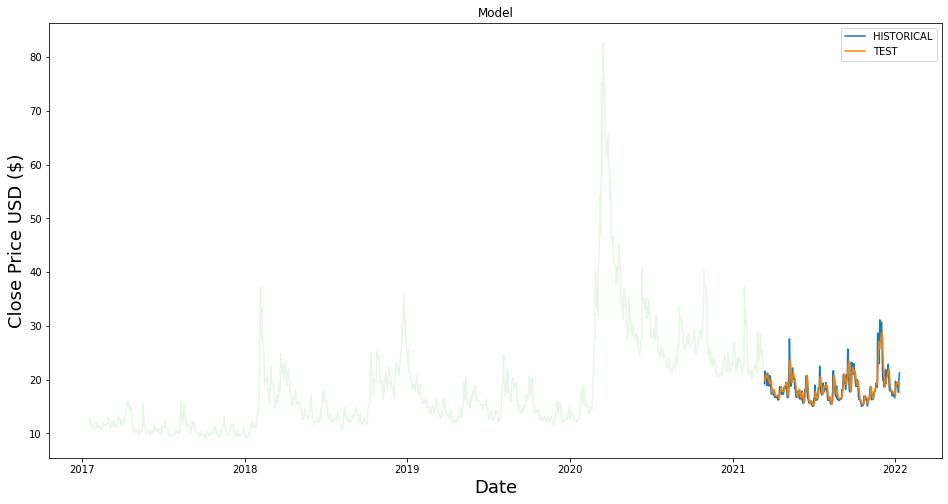

In [158]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(newdf['Actual_Close'],label='HISTORICAL')
plt.plot(newdf['Predicted_Close'],label='TEST')
plt.plot(origdata['Close'],alpha=0.1)

plt.legend()



plt.show

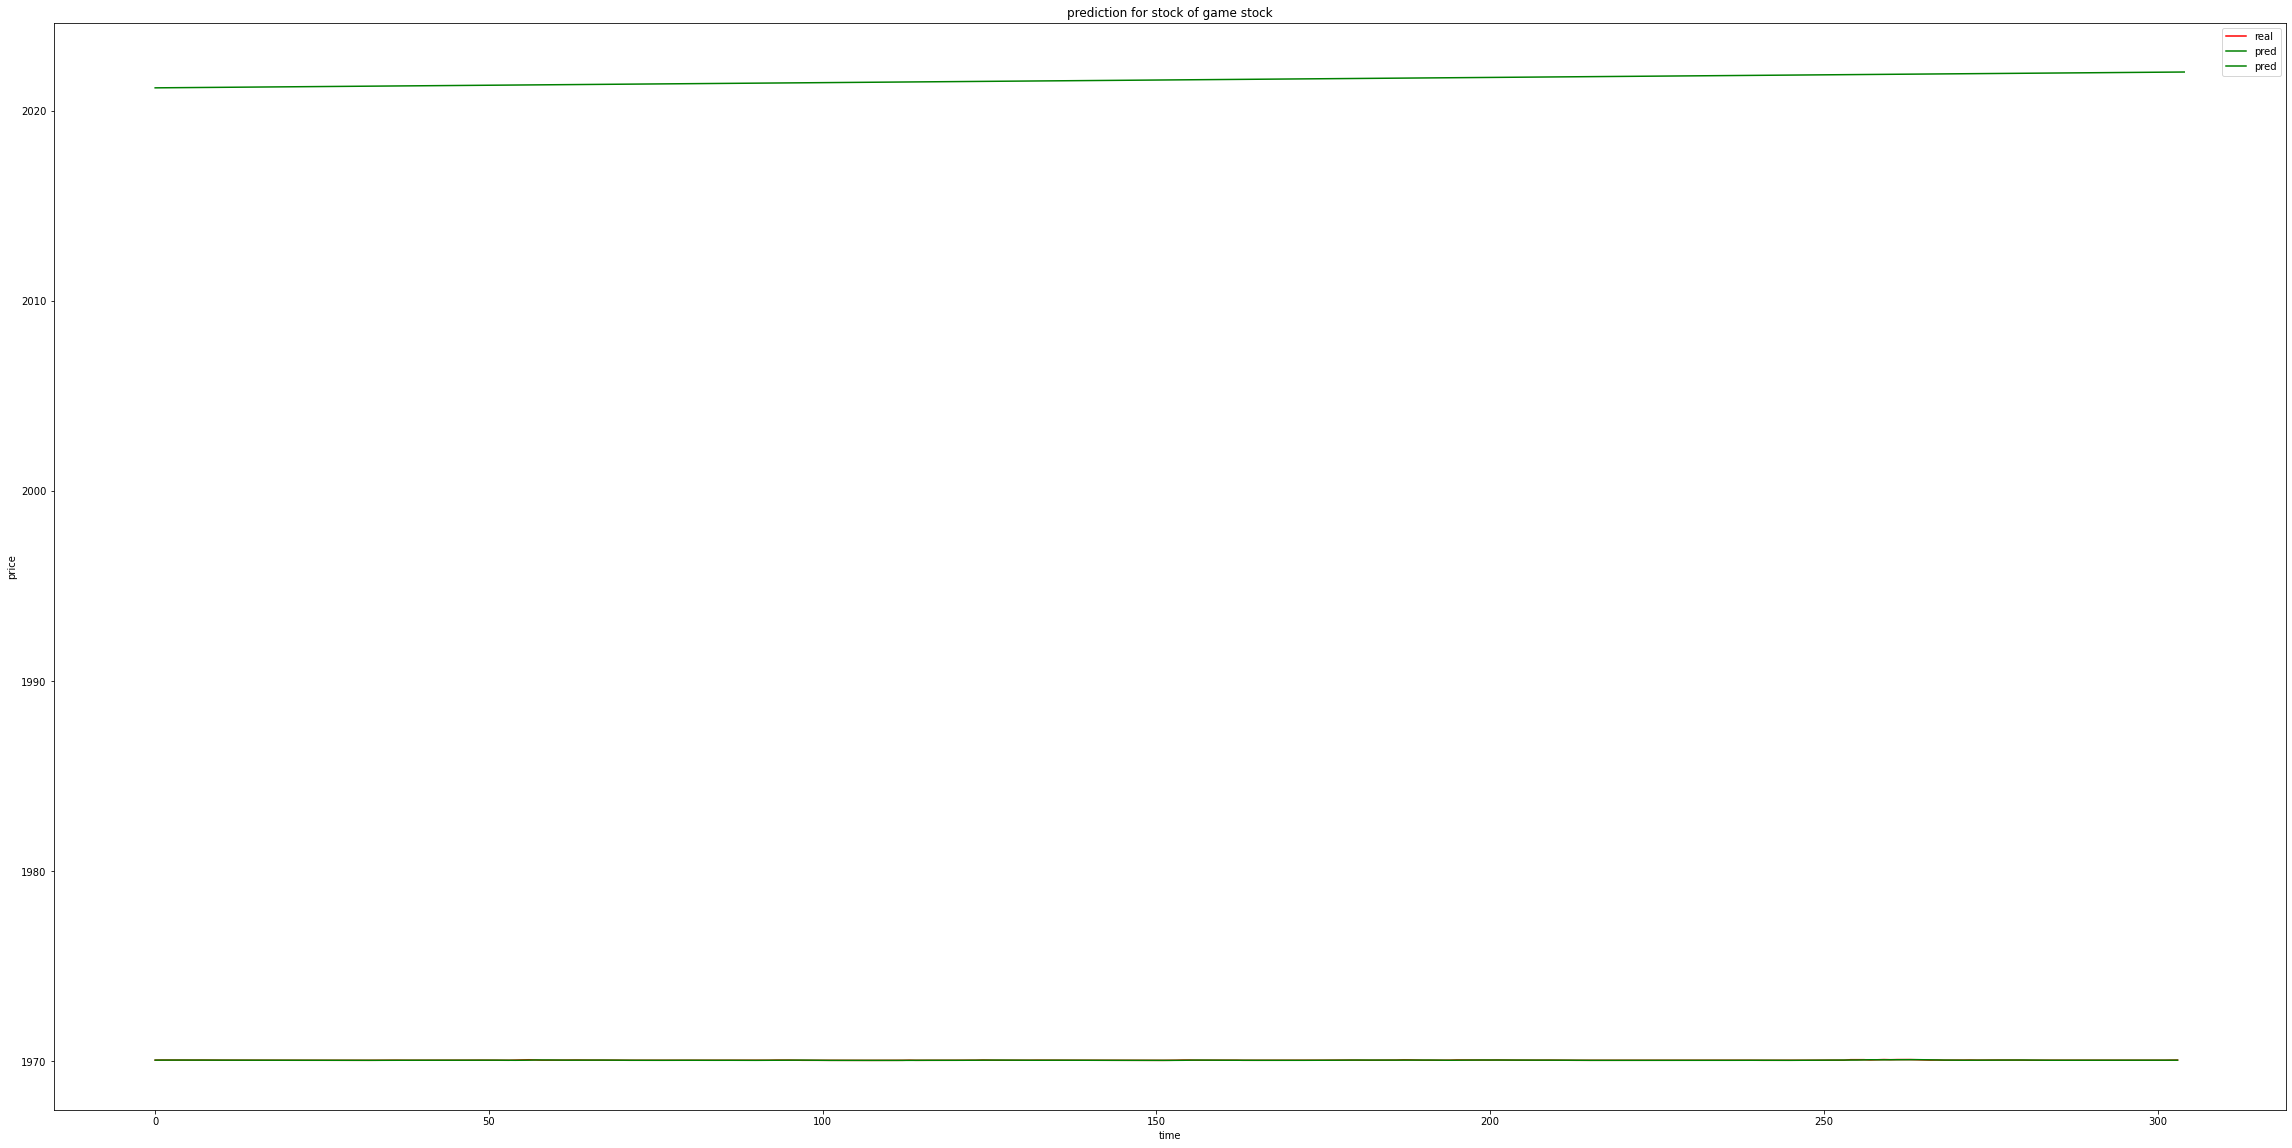

In [159]:
plt.figure(figsize=(40,20))
plt.plot(y_test, color= 'red' ,label ="real")
plt.plot(y_prediction, color= 'green' ,label ="pred")
plt.title("prediction for stock of game stock")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()


# FUTURE FORECAST

In [160]:

#Get the last 60 day closing price values and convert the dataframe to an array
last_360_days = alldata[-360:].values


In [161]:
last_360_days

array([[21.57999992],
       [21.31999969],
       [21.90999985],
       [21.90999985],
       [21.90999985],
       [23.19000053],
       [23.02000046],
       [37.20999908],
       [30.20999908],
       [33.09000015],
       [33.09000015],
       [33.09000015],
       [30.23999977],
       [25.55999947],
       [22.90999985],
       [21.77000046],
       [20.87000084],
       [20.87000084],
       [20.87000084],
       [21.23999977],
       [21.62999916],
       [21.98999977],
       [21.25      ],
       [19.96999931],
       [19.96999931],
       [19.96999931],
       [19.96999931],
       [21.45999908],
       [21.5       ],
       [22.48999977],
       [22.04999924],
       [22.04999924],
       [22.04999924],
       [23.45000076],
       [23.11000061],
       [21.34000015],
       [28.88999939],
       [27.95000076],
       [27.95000076],
       [27.95000076],
       [23.35000038],
       [24.10000038],
       [26.67000008],
       [28.56999969],
       [24.65999985],
       [24

In [162]:
#scale the data to be values between 0 and 1
last_360_days_scaled = scaler.transform(last_360_days)


In [163]:
#create an empty list
X_future = []

In [164]:
#append the past 60 days
X_future.append(last_360_days_scaled)

#convert the X_test data set to a numpy array
X_future = np.array(X_future)

#reshape the data
X_future = np.reshape(X_future,(X_future.shape[0], X_future.shape[1],1))

In [165]:
X_future

array([[[0.16913663],
        [0.16560162],
        [0.17362337],
        [0.17362337],
        [0.17362337],
        [0.19102651],
        [0.18871516],
        [0.38164511],
        [0.28647176],
        [0.32562881],
        [0.32562881],
        [0.32562881],
        [0.28687966],
        [0.22324947],
        [0.18721957],
        [0.17171992],
        [0.15948335],
        [0.15948335],
        [0.15948335],
        [0.16451392],
        [0.16981643],
        [0.17471107],
        [0.16464989],
        [0.14724675],
        [0.14724675],
        [0.14724675],
        [0.14724675],
        [0.16750508],
        [0.16804894],
        [0.18150916],
        [0.17552683],
        [0.17552683],
        [0.17552683],
        [0.19456152],
        [0.18993882],
        [0.16587355],
        [0.26852479],
        [0.25574439],
        [0.25574439],
        [0.25574439],
        [0.1932019 ],
        [0.20339904],
        [0.23834125],
        [0.26417401],
        [0.2110129 ],
        [0

In [166]:
pred_price = model.predict(X_future)

In [167]:
pred_price

array([[0.14944416]], dtype=float32)

In [168]:
#undo the scaling & predict for 08th March 2021
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[20.13162]]


In [169]:
pred_price.shape

(1, 1)

In [170]:
pred_price=pd.DataFrame(pred_price)
pred_price

,0
0,20.13162


In [171]:
date = pd.DataFrame()
date['Date'] = pd.date_range('today', periods = 1, freq ='d')
date

,Date
0,2022-01-14 19:29:09.369887


In [172]:
forecast = pd.concat([date,pred_price],axis=1)
forecast

,Date,0
0,2022-01-14 19:29:09.369887,20.13162


In [173]:
forecast.set_index(forecast["Date"], inplace=True)
forecast=forecast.drop(['Date'], axis=1)
forecast

,0
Date,
2022-01-14 19:29:09.369887,20.13162


In [174]:
forecast.columns=['Forecasted_Close']
forecast

,Forecasted_Close
Date,
2022-01-14 19:29:09.369887,20.13162


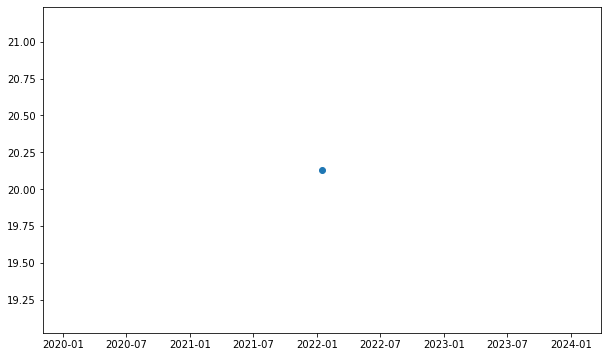

In [175]:
plt.scatter(date,forecast['Forecasted_Close'])

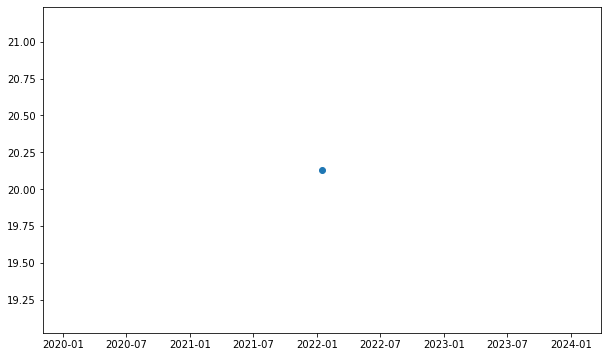

In [176]:
plt.scatter(date, forecast)

<function matplotlib.pyplot.show(close=None, block=None)>

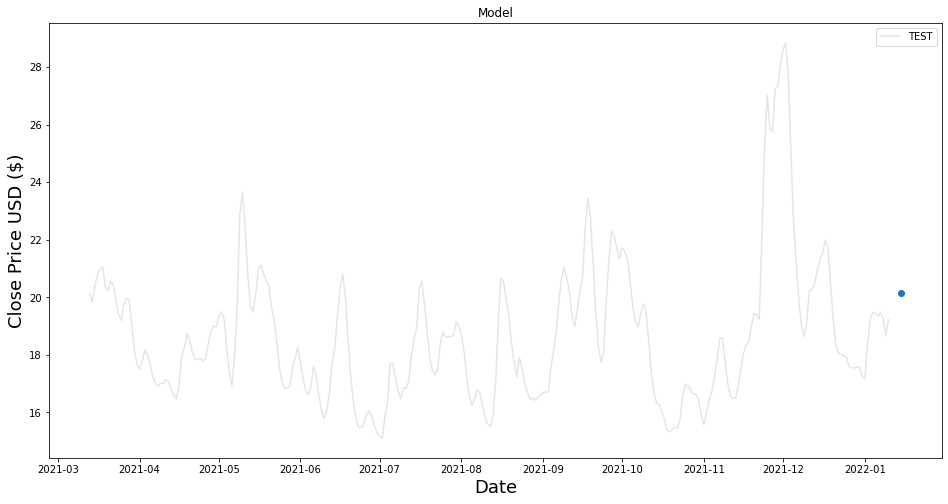

In [177]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

#plt.plot(newdf['Actual_Close'],label='HISTORICAL')
plt.plot(newdf['Predicted_Close'],color='black', alpha=0.1, label='TEST')
#plt.plot(origdata['Close'],alpha=0.1)

#plt.plot(forecast['Forecasted_Close'], color='black', alpha=100, label='x')

#plt.scatter(date, forecast)
#plt.plot(forecast['Forecasted_Close'],color='black', alpha=100, label='x')
plt.scatter(date,forecast['Forecasted_Close'])
plt.legend()

plt.show